<a href="https://colab.research.google.com/github/pranavpathak08/taxi-fare/blob/main/taxi_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('train.csv')
data.head(3)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [111]:
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [112]:
data.isin([' ']).sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [113]:
data.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,209673.0,1173.181478,4775.653621,0.00,446.00,707.00,1098.00,86387.00
distance_traveled,209673.0,5.054431,125.217419,0.02,1.95,3.20,5.73,57283.91
num_of_passengers,209673.0,1.292808,0.930754,0.00,1.00,1.00,1.00,9.00
fare,209673.0,99.623431,85.602702,0.00,52.50,75.00,116.25,4466.25
tip,209673.0,13.030824,20.367764,0.00,0.00,9.00,20.00,2500.00
miscellaneous_fees,209673.0,15.136829,12.553436,-0.50,6.00,9.75,26.45,435.00
total_fare,209673.0,127.791084,98.797374,0.00,70.20,101.70,152.25,4472.25
surge_applied,209673.0,0.280523,0.449256,0.00,0.00,0.00,1.00,1.00


In [115]:
data = data.drop('surge_applied', axis=1)

In [116]:
data.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
0,748.0,2.75,1.0,75.00,24,6.300,105.300
1,1187.0,3.43,1.0,105.00,24,13.200,142.200
2,730.0,3.12,1.0,71.25,0,26.625,97.875
3,671.0,5.63,3.0,90.00,0,9.750,99.750
4,329.0,2.09,1.0,45.00,12,13.200,70.200


In [117]:
X = data.drop('total_fare', axis=1)
y = data['total_fare']

In [118]:
X = X.to_numpy()
y= y.to_numpy()

In [119]:
X.shape, y.shape

((209673, 6), (209673,))

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
mm = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[-0.08903127, -0.01840348, -0.31459349, -0.28764851,  0.538557  ,
        -0.70393875],
       [ 0.00289354, -0.01297292, -0.31459349,  0.06280855,  0.538557  ,
        -0.15428711],
       [-0.09280039, -0.01544862, -0.31459349, -0.33145564, -0.63977839,
         0.9151438 ],
       ...,
       [-0.12609434, -0.01784445, -0.31459349, -0.41906991, -0.63977839,
        -0.72783664],
       [-0.14284602, -0.0231153 , -0.31459349, -0.50668417, -0.63977839,
        -0.13038921],
       [ 0.51109744,  0.22892691, -0.31459349,  2.77885078, -0.63977839,
        -1.02656036]])

In [121]:
X[:5]

array([[-0.08903127, -0.01840348, -0.31459349, -0.28764851,  0.538557  ,
        -0.70393875],
       [ 0.00289354, -0.01297292, -0.31459349,  0.06280855,  0.538557  ,
        -0.15428711],
       [-0.09280039, -0.01544862, -0.31459349, -0.33145564, -0.63977839,
         0.9151438 ],
       [-0.10515475,  0.00459657,  1.83420806, -0.11241998, -0.63977839,
        -0.42911293],
       [-0.17676816, -0.02367433, -0.31459349, -0.63810557, -0.05061069,
        -0.15428711]])

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now to choose the best ML model for this we can use this cheat sheet
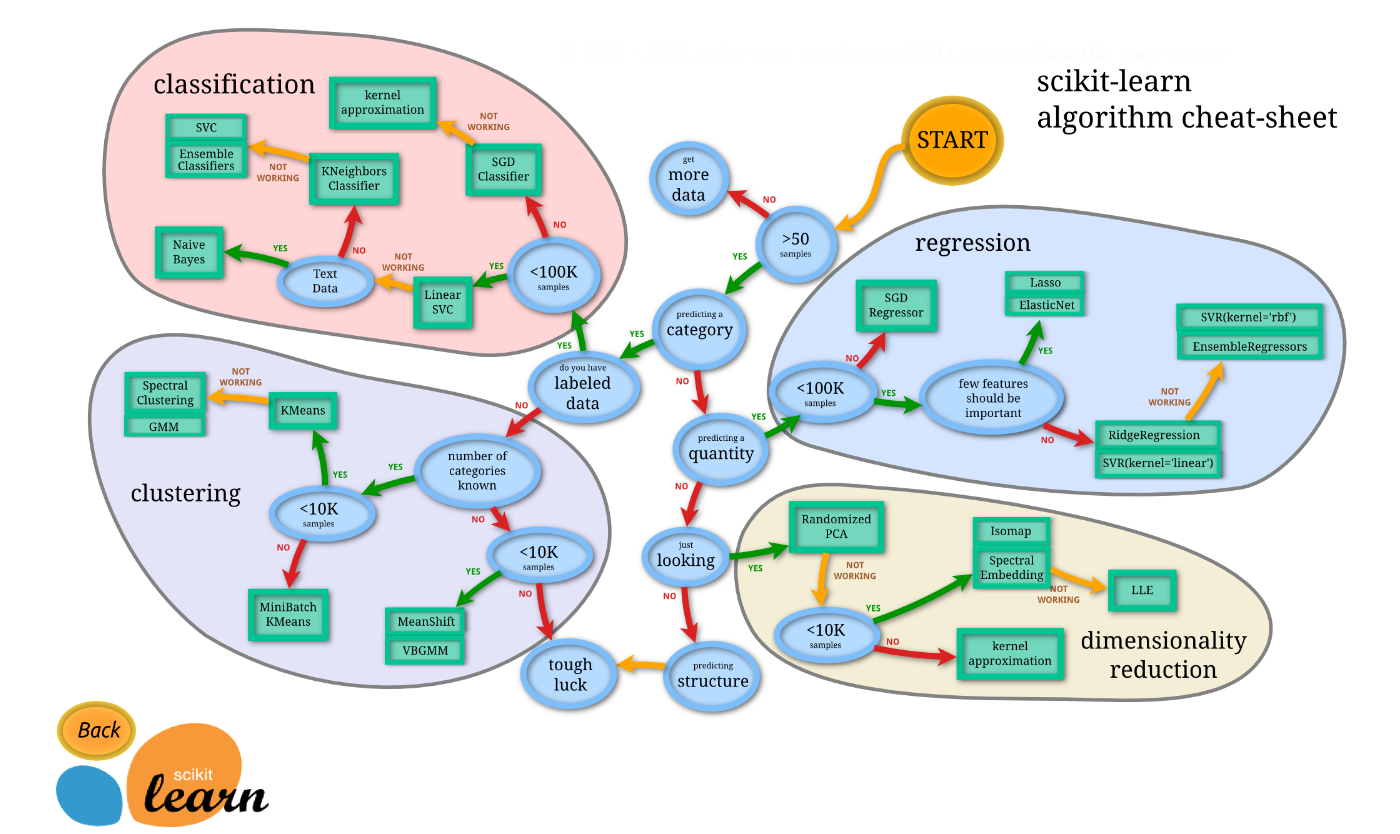

According to the conditions our best model will be either Lasso or ElasticNet

In [123]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(fit_intercept=True)
lasso_model.fit(X_train, y_train)

Lasso()

In [124]:
from sklearn.metrics import r2_score
y_preds = lasso_model.predict(X_test)
lasso_r2_score = r2_score(y_test, y_preds)
lasso_r2_score

0.9998101664584591

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
print('mae for lasso model is : ', mae)
print('mse for lasso model is : ', mse)

mae for lasso model is :  0.9310677618166205
mse for lasso model is :  1.703036205170813


In [126]:
lasso_model.intercept_

127.79450925876432

In [127]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet(fit_intercept=True)
en_model.fit(X_train, y_train)

ElasticNet()

In [128]:
y_preds = en_model.predict(X_test)
en_r2_score = r2_score(y_test, y_preds)
en_r2_score

0.920279992861011

In [129]:
mse_en_model = mean_squared_error(y_test, y_preds)
mae_en_model = mean_absolute_error(y_test, y_preds)
print('mae for Elastic Net model is : ', mae_en_model)
print('mse for Elastic Net model is : ', mse_en_model)

mae for Elastic Net model is :  16.491473659700098
mse for Elastic Net model is :  715.1847736291584


Certainly, Lasso Model performed better than Elastic Model


## Hyperparameter Tuning for Lasso Model


In [130]:
from sklearn.model_selection import GridSearchCV
estimator = Lasso(random_state=64)

lasso_gs = GridSearchCV(estimator, {'alpha' : [0.001, 0.01, 0.1, 1],
                                    'fit_intercept'  : [True, False],
                                    'max_iter' : [100,200,500,1000],
                                    },
                        cv=4)
lasso_gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(random_state=64),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 500, 1000]})

In [131]:
lasso_gs.best_estimator_

Lasso(alpha=0.001, max_iter=100, random_state=64)

In [132]:
lasso_gs.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 100}

In [133]:
y_preds = lasso_gs.best_estimator_.predict(X_test)
lasso_gs_r2_score = r2_score(y_test, y_preds)
lasso_gs_r2_score

0.9999999995626849

In [134]:
mse_lasso_gs = mean_squared_error(y_test, y_preds)
mae_lasso_gs = mean_absolute_error(y_test, y_preds)
print('mae for lasso model is : ', mae_lasso_gs)
print('mse for lasso model is : ', mse_lasso_gs)

mae for lasso model is :  0.0012872336941684454
mse for lasso model is :  3.923245013419591e-06


In [135]:
lasso_gs.best_estimator_.intercept_

127.7910909682796

# We can see clearly that our scores are even more better after performing Hyperparameter Tuning with GridSearchCV